In [101]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import pylab
import math
import os
import scipy.stats as stats
from scipy.stats import ttest_1samp

# Question 1

In [45]:
wholesale_df= pd.read_csv('Wholesale+Customers+Data.csv')

In [47]:
wholesale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [3]:
wholesale_df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [4]:
print('Descriptive Statistics of Wholesale Customers')
wholesale_df.describe().T

Descriptive Statistics of Wholesale Customers


,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,220.500000,127.161315,1.0,110.75,220.5,330.25,440.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [5]:
wholesale_df['Total Spending']= wholesale_df['Fresh']+wholesale_df['Milk']+ wholesale_df['Grocery']+ wholesale_df['Frozen']+wholesale_df['Detergents_Paper']+ wholesale_df['Delicatessen']
wholesale_df

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total Spending
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204,73302
436,437,Hotel,Other,39228,1431,764,4510,93,2346,48372
437,438,Retail,Other,14531,15488,30243,437,14841,1867,77407
438,439,Hotel,Other,10290,1981,2232,1038,168,2125,17834




## 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?


In [41]:
region_spending= wholesale_df.groupby('Region')['Total Spending'].sum()
region_spending
print('Region with highest spending is Other: ', max(region_spending))

Region with highest spending is Other:  10677599


In [42]:
print('Region with lowest spending  is Oporto: ', min(region_spending))

Region with lowest spending  is Oporto:  1555088


In [16]:
region_mean= wholesale_df.groupby('Region').mean()
region_mean

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total Spending
Region,,,,,,,,
Lisbon,235.000000,11101.727273,5486.415584,7403.077922,3000.337662,2651.116883,1354.896104,30997.571429
Oporto,317.000000,9887.680851,5088.170213,9218.595745,4045.361702,3687.468085,1159.702128,33086.978723
Other,202.613924,12533.471519,5977.085443,7896.363924,2944.594937,2817.753165,1620.601266,33789.870253


In [44]:
channel_spending= wholesale_df.groupby('Channel')['Total Spending'].sum()
channel_spending
print('Channel with highest spending is Hotel: ', max(channel_spending))

Channel with highest spending is Hotel:  7999569


In [45]:
print('Channel with lowest spending is Retail: ', min(channel_spending))

Channel with lowest spending is Retail:  6619931


In [17]:
channel_mean= wholesale_df.groupby('Channel').mean()
channel_mean

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total Spending
Channel,,,,,,,,
Hotel,238.369128,13475.560403,3451.724832,3962.137584,3748.251678,790.560403,1415.956376,26844.191275
Retail,183.000000,8904.323944,10716.500000,16322.852113,1652.612676,7269.507042,1753.436620,46619.232394


## 1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer

Text(0.5, 1.0, 'Fresh')

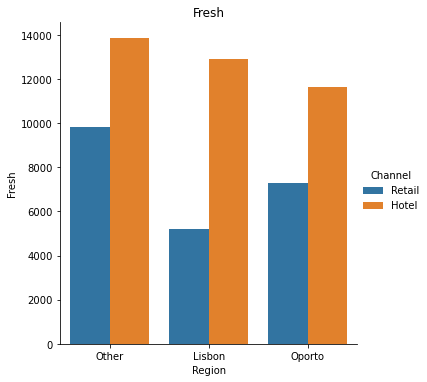

In [6]:
sns.catplot(x='Region',y= 'Fresh', kind='bar',hue='Channel', ci=None,data=wholesale_df)
plt.title('Fresh')

In [47]:
# Fresh items are more saled in hotel channel when compared to retail channel.
# The sale of fresh items in Retail channel is more in Other region when compared to Lisbon and Oporto regions and Lisbon has recorded less sale.
# In Hotel channel the sale of fresh items is more in Other regions and less in Oporto.



Text(0.5, 1.0, 'Milk')

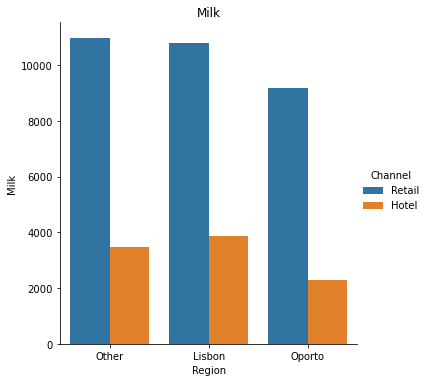

In [235]:
sns.catplot(x='Region',y= 'Milk', kind='bar',hue='Channel', ci=None,data=wholesale_df)
plt.title('Milk')

In [ ]:
# Sale of milk is higher in Retail Channel than Hotel channel
# Other region has the highest sale of milk and Oporto has less sale of milk in Retail channel
# Lisbon recorded the highest sale of milk in Hotel channel.

Text(0.5, 1.0, 'Grocery')

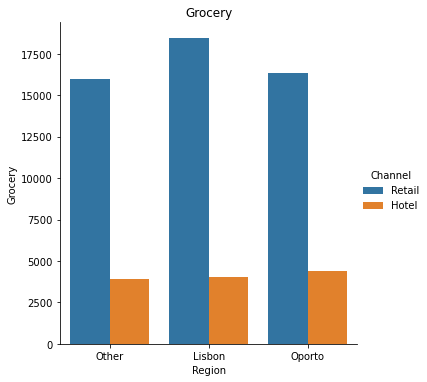

In [236]:
sns.catplot(x='Region',y= 'Grocery', kind='bar',hue='Channel', ci=None,data=wholesale_df)
plt.title('Grocery')

In [ ]:
# Sale of grocery is higher in Retail Channel than Hotel channel
# Lisbon region has the highest sale of grocery in retail channel.
# Oporto recorded the highest sale of grocery in Hotel channel.

Text(0.5, 1.0, 'Frozen')

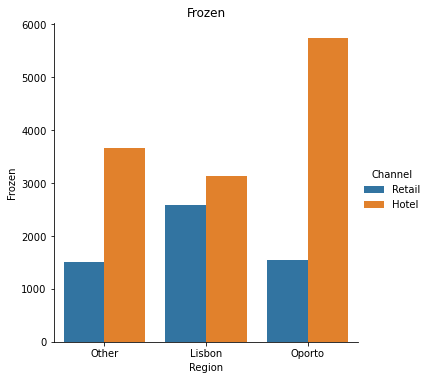

In [237]:
sns.catplot(x='Region',y= 'Frozen', kind='bar',hue='Channel', ci=None,data=wholesale_df)
plt.title('Frozen')

In [ ]:
# Frozen items are more saled in hotel channel when compared to retail channel.
# The sale of frozen items in Hotel channel is more in Oporto region when compared to other and Lisbon regions.
# In Retail channel the sale of frozen items is more in Lisbon regions.



Text(0.5, 1.0, 'Detergents_Paper')

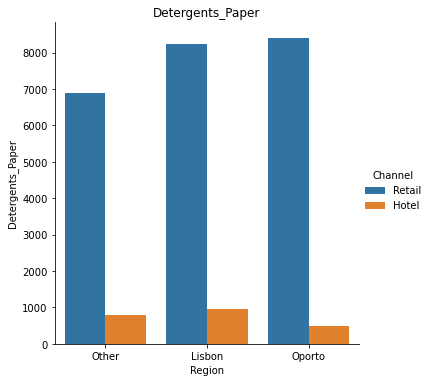

In [238]:
sns.catplot(x='Region',y= 'Detergents_Paper', kind='bar',hue='Channel', ci=None,data=wholesale_df)
plt.title('Detergents_Paper')

In [ ]:
# Sale of Detergent Paper is higher in Retail Channel than Hotel channel
# Oporto region has the highest sale of Detergent Paper and Other has less sale of Detergent Paper in Retail channel
# Lisbon recorded the highest sale of Detergent Paper in Hotel channel.

Text(0.5, 1.0, 'Delicatessen')

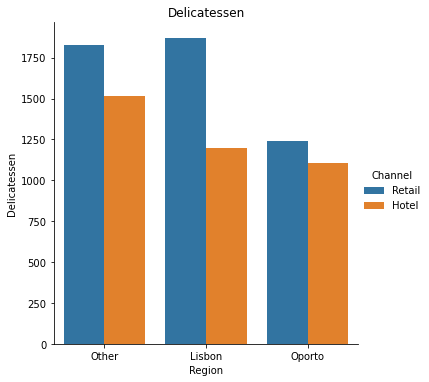

In [239]:
sns.catplot(x='Region',y= 'Delicatessen', kind='bar',hue='Channel', ci=None,data=wholesale_df)
plt.title('Delicatessen')

In [ ]:
# Delicatessen items are more saled in retail channel when compared to hotel channel.
# The sale of Delicatessen items in Hotel channel is more in Other region when compared to Lisbon and Oporto regions.
# In Retail channel the sale of Delicatessen items is more in Lisbon region and less in Oporto.



## 1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [71]:
wholesale1_df=wholesale_df.drop(columns=[('Buyer/Spender'),('Total Spending')])
wholesale1_df.std()

Fresh               12647.328865
Milk                 7380.377175
Grocery              9503.162829
Frozen               4854.673333
Detergents_Paper     4767.854448
Delicatessen         2820.105937
dtype: float64

### From the Standard Deviation 
Fresh items have higher deviation so they are inconsistent. Delicatessen items have lower deviation hence considered as consistent.
According to coefficient of variation we shall see which item is consistent and inconsistent.

CoV= Standard Deviation/ Mean



In [199]:
fresh_cov= np.std(wholesale_df['Fresh'])/np.mean(wholesale_df['Fresh'])
fresh_cov

1.0527196084948245

In [74]:
milk_cov= np.std(wholesale_df['Milk'])/np.mean(wholesale_df['Milk'])
milk_cov

1.2718508307424503

In [75]:
grocery_cov= np.std(wholesale_df['Grocery'])/np.mean(wholesale_df['Grocery'])
grocery_cov

1.193815447749267

In [193]:
frozen_cov= np.std(wholesale_df['Frozen'])/np.mean(wholesale_df['Frozen'])
frozen_cov

1.5785355298607762

In [77]:
detergents_cov= np.std(wholesale_df['Detergents_Paper'])/np.mean(wholesale_df['Detergents_Paper'])
detergents_cov

1.6527657881041729

In [202]:
delicatessen_cov= np.std(wholesale_df['Delicatessen'])/np.mean(wholesale_df['Delicatessen'])
delicatessen_cov

1.8473041039189306

In [201]:
print('Item that shows the least inconsistent behaviour : Fresh', fresh_cov)



Item that shows the least inconsistent behaviour : Fresh 1.0527196084948245


In [203]:
print('Item that shows the most inconsistent behaviour : Delicatessen', delicatessen_cov)


Item that shows the most inconsistent behaviour : Delicatessen 1.8473041039189306


In [102]:
wholesale1_df=wholesale_df.drop(columns=[('Buyer/Spender'),('Total Spending')])
item_variance= wholesale1_df.var()
item_variance

Fresh               1.599549e+08
Milk                5.446997e+07
Grocery             9.031010e+07
Frozen              2.356785e+07
Detergents_Paper    2.273244e+07
Delicatessen        7.952997e+06
dtype: float64

## 1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

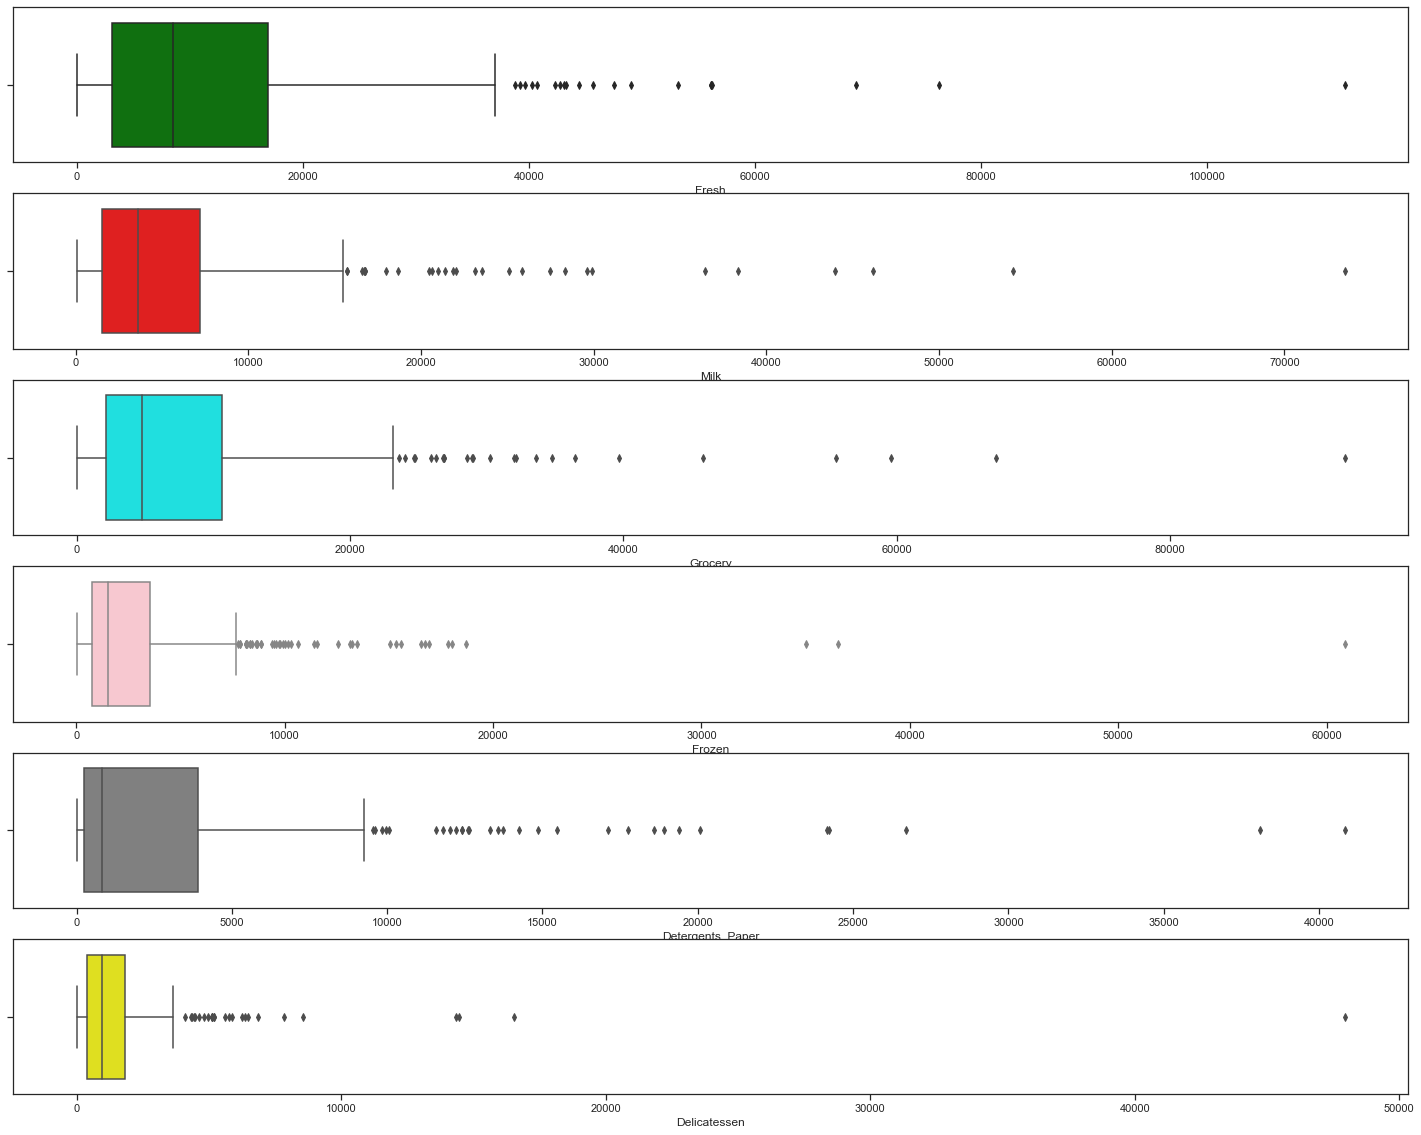

In [132]:
plt.figure(figsize=(25,20))

plt.subplot(6,1,1)
sns.boxplot(x=wholesale_df.Fresh, color='green')

plt.subplot(6,1,2)
sns.boxplot(x=wholesale_df.Milk, color='red')

plt.subplot(6,1,3)
sns.boxplot(x=wholesale_df.Grocery, color='cyan')

plt.subplot(6,1,4)
sns.boxplot(x=wholesale_df.Frozen, color='pink')

plt.subplot(6,1,5)
sns.boxplot(x=wholesale_df.Detergents_Paper, color='gray')

plt.subplot(6,1,6)
sns.boxplot(x=wholesale_df.Delicatessen, color='yellow')
plt.show()

In [ ]:
# from the above boxplots it is clear that, there are outliers in the data
# we have outliers for the following items Fresh, Milk, Grocery, Frozen, Detergent Paper, Delicatessen
# almost all the items are right skewed. 

## 1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective



### It is clear from the data analysis that 'Other' region and 'Retail' channel have the most spendings than other channels and regions.

### If anyone wants to open a business, it is recommended that the person opens a business in 'Other' region in 'Retail' channel which is highly profitable for the business.

### It is also observed that there is a very high spending on Fresh foods in all regions. Fresh foods is followed by Grocery and Milk products. So, if a person plans to setup a business he must try setting it up in Fresh items

### Delicatessen has least inconsistent behaviour across all regions and channels through standard deviation. Can also be saled in all channels and regions.

# Question 2

In [55]:
cmsu_df= pd.read_csv('Survey-1.csv')

cmsu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [155]:
cmsu_df.isnull().sum()

ID                   0
Gender               0
Age                  0
Class                0
Major                0
Grad Intention       0
GPA                  0
Employment           0
Salary               0
Social Networking    0
Satisfaction         0
Spending             0
Computer             0
Text Messages        0
dtype: int64

In [139]:
cmsu_df.describe()

,ID,Age,GPA,Salary,Social Networking,Satisfaction,Spending,Text Messages
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,31.500000,21.129032,3.129032,48.548387,1.516129,3.741935,482.016129,246.209677
std,18.041619,1.431311,0.377388,12.080912,0.844305,1.213793,221.953805,214.465950
min,1.000000,18.000000,2.300000,25.000000,0.000000,1.000000,100.000000,0.000000
25%,16.250000,20.000000,2.900000,40.000000,1.000000,3.000000,312.500000,100.000000
50%,31.500000,21.000000,3.150000,50.000000,1.000000,4.000000,500.000000,200.000000
75%,46.750000,22.000000,3.400000,55.000000,2.000000,4.000000,600.000000,300.000000
max,62.000000,26.000000,3.900000,80.000000,4.000000,6.000000,1400.000000,900.000000


In [153]:
cmsu_df.head(62)

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50


## 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

### 2.1.1. Gender and Major

In [19]:
pd.crosstab(index=cmsu_df['Gender'], columns=cmsu_df['Major'], margins=True)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


### 2.1.2. Gender and Grad Intention

In [151]:
pd.crosstab(index=cmsu_df['Gender'], columns=cmsu_df['Grad Intention'], margins=True)

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


### 2.1.3. Gender and Employment


In [150]:
pd.crosstab(index=cmsu_df['Gender'], columns=cmsu_df['Employment'], margins=True)

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


### 2.1.4 Gender and Computer

In [7]:
pd.crosstab(index=cmsu_df['Gender'], columns=cmsu_df['Computer'], margins=True)

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


## 2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

### 2.2.1. What is the probability that a randomly selected CMSU student will be male?



In [14]:
# Probability that a randomly selected CMSU student will be male is
# p(m)= Total number of males/ total number of students

t_males= 29
t_students=62

p_male= t_males/t_students
print('Probability that a randomly selected CMSU student will be male is :', p_male)

Probability that a randomly selected CMSU student will be male is : 0.46774193548387094


In [14]:
# If we see in percentage of male in CMSU

print(round(p_male*100, 2), '% are the male students in CMSU')

46.77 % are the male students in CMSU


### 2.2.2. What is the probability that a randomly selected CMSU student will be female

In [17]:
# Probability that a randomly selected CMSU student will be female is
# p(f)= Total number of females/ total number of students

t_females= 33
t_students=62

p_female= t_females/t_students
print('Probability that a randomly selected CMSU student will be female is :', p_female)

Probability that a randomly selected CMSU student will be female is : 0.532258064516129


In [18]:
# If we see in percentage of female in CMSU

print(round(p_female*100, 2), '% are the female students in CMSU')

53.23 % are the female students in CMSU


## 2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

### 2.3.1. Find the conditional probability of different majors among the male students in CMSU.

In [22]:
pd.crosstab(index=cmsu_df['Gender'], columns=cmsu_df['Major'], margins=True)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [143]:
# Total number of male student in CMSU are = 29 out of 62
# there are 8 majors in CMSU

p_m_accounting= 4/29
p_m_cis = 1/29
p_m_ecofin= 4/29
p_m_ibusiness= 2/29
p_m_management= 6/29
p_m_other= 4/29
p_m_retailmarket= 5/29
p_m_undecided= 3/29
print(round(p_m_accounting*100,2),'% is the Probability of males present in CMSU with Accounting as major ')
print()
print(round(p_m_cis*100,2),'% is the Probability of males present in CMSU with CIS as major ')
print()
print(round(p_m_ecofin*100,2),'% is the Probability of males present in CMSU with Economics/Finance as major ')
print()
print(round(p_m_ibusiness*100,2),'% is the Probability of males present in CMSU with International Business as major ')
print()
print(round(p_m_management*100,2),'% is the Probability of males present in CMSU with Management as major ')
print()
print(round(p_m_other*100,2),'% is the Probability of males present in CMSU with Other as major ')
print()
print(round(p_m_retailmarket*100,2),'% is the Probability of males present in CMSU with Retailing/Marketing as major ')
print()
print(round(p_m_undecided*100,2),'% is the Probability of males present in CMSU with Undecided as major ')


13.79 % is the Probability of males present in CMSU with Accounting as major 

3.45 % is the Probability of males present in CMSU with CIS as major 

13.79 % is the Probability of males present in CMSU with Economics/Finance as major 

6.9 % is the Probability of males present in CMSU with International Business as major 

20.69 % is the Probability of males present in CMSU with Management as major 

13.79 % is the Probability of males present in CMSU with Other as major 

17.24 % is the Probability of males present in CMSU with Retailing/Marketing as major 

10.34 % is the Probability of males present in CMSU with Undecided as major 


### 2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [104]:
pd.crosstab(index=cmsu_df['Gender'], columns=cmsu_df['Major'], margins=True)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [13]:
# Total number of female student in CMSU are = 33 out of 62
# there are 8 majors in CMSU

p_f_accounting= 3/33
p_f_cis = 3/33
p_f_ecofin= 7/33
p_f_ibusiness= 4/33
p_f_management= 4/33
p_f_other= 3/33
p_f_retailmarket= 9/33
p_f_undecided= 0/33
print(round(p_f_accounting*100,2),'% is the Probability of females present in CMSU with Accounting as major ')
print()
print(round(p_f_cis*100,2),'% is the Probability of females present in CMSU with CIS as major ')
print()
print(round(p_f_ecofin*100,2),'% is the Probability of females present in CMSU with Economics/Finance as major ')
print()
print(round(p_f_ibusiness*100,2),'% is the Probability of females present in CMSU with International Business as major ')
print()
print(round(p_f_management*100,2),'% is the Probability of females present in CMSU with Management as major ')
print()
print(round(p_f_other*100,2),'% is the Probability of females present in CMSU with Other as major ')
print()
print(round(p_f_retailmarket*100,2),'% is the Probability of females present in CMSU with Retailing/Marketing as major ')
print()
print(round(p_f_undecided*100,2),'% is the Probability of females present in CMSU with Undecided as major ')


9.09 % is the Probability of females present in CMSU with Accounting as major 

9.09 % is the Probability of females present in CMSU with CIS as major 

21.21 % is the Probability of females present in CMSU with Economics/Finance as major 

12.12 % is the Probability of females present in CMSU with International Business as major 

12.12 % is the Probability of females present in CMSU with Management as major 

9.09 % is the Probability of females present in CMSU with Other as major 

27.27 % is the Probability of females present in CMSU with Retailing/Marketing as major 

0.0 % is the Probability of females present in CMSU with Undecided as major 


## 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

### 2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

In [110]:
pd.crosstab(index=cmsu_df['Gender'], columns=cmsu_df['Grad Intention'], margins=True)

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


In [24]:
# Total number of males are 29 out of which 17 are graduated

p_m= 29/62
p_mgraduated= 17/29

p_m_graduated =p_m* p_mgraduated

print(round(p_m_graduated*100,2), '% is the percentage of males who intends to be a graduate')

27.42 % is the percentage of males who intends to be a graduate


### 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop. 

In [114]:
pd.crosstab(index=cmsu_df['Gender'], columns=cmsu_df['Computer'], margins=True)

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


In [121]:
# Female student in total are 33 out of which females with no laptop are 4

p_f= 33/62
p_fnolaptop= 4/33

p_f_nolaptop= p_f* p_fnolaptop
print(round(p_f_nolaptop*100,2), '% is the percentage of females who do not have a laptop')

6.45 % is the percentage of females who do not have a laptop


## 2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:



### 2.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?

In [68]:
pd.crosstab(index=cmsu_df['Gender'], columns=cmsu_df['Employment'], margins=True)

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


In [11]:
# student chosen is a male can be total number of male/total student
# chosen student shall have a full time employment is total number of full time/ total number of students
# as the events are occuring at same time we have to subtract probability of events overlapping by
# p(m)+p(fulltime)-(p(m)*p(fulltime))

t_students= 62
t_males= 29
t_fulltime= 10

p_m= (t_males/t_students)
p_fulltime= t_fulltime/t_students
p_mfulltime= 7/62

p_m_fulltime= p_m+p_fulltime- (p_mfulltime)
print('Probability that a randomly chosen student is a male or has full-time employment is :', round(p_m_fulltime*100,2) , "%")

Probability that a randomly chosen student is a male or has full-time employment is : 51.61 %


### 2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.



In [78]:
pd.crosstab(index=cmsu_df['Gender'], columns=cmsu_df['Major'], margins=True)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [91]:
t_females= 33
f_ibusiness= 4
f_management=4

p_ibusiness= f_ibusiness/t_females
p_management= f_management/t_females

p_ibusiness_management= p_ibusiness+p_management
print('Probability of female student chosen randomly majoring in International Business or Management :' ,round(p_ibusiness_management*100,2), '%')

Probability of female student chosen randomly majoring in International Business or Management : 24.24 %


## 2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [108]:
pd.crosstab(index=cmsu_df['Gender'], columns=cmsu_df['Grad Intention'],  margins=True)


Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


In [12]:
# By elimitating Undecided from the table, it looks like
# Grad Intention   No   Yes  All
# Gender
# Female           9.   11.  20
# Male             3.   17   20
# All.             12.  28.  40

# To prove if the events are independent it must satisfy the equation P(F and G) = P(G) *P(F) 

p_f_grad= 11/40

print('Probability of F and G :', round(p_f_grad*100,2), '%')

p_fem= 20/40
p_grad=28/40

p_fem_grad= p_fem* p_grad

print('Probability of Female * Probability of Grad :', round(p_fem_grad*100,2), '%')

Probability of F and G : 27.5 %
Probability of Female * Probability of Grad : 35.0 %


In [ ]:
## Inference
## As both the probabilties are not equal, Grad intention and being female are not independent events

## 2.7 Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending and Text Messages. Answer the following questions based on the data

### 2.7.1 If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [172]:
pd.crosstab(cmsu_df.Gender, cmsu_df.GPA, margins=True)

GPA,2.3,2.4,2.5,2.6,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,All
Gender,,,,,,,,,,,,,,,,,
Female,1,1,2,0,1,3,5,2,4,3,2,4,1,2,1,1,33
Male,0,0,4,2,2,1,2,5,2,2,5,2,2,0,0,0,29
All,1,1,6,2,3,4,7,7,6,5,7,6,3,2,1,1,62


In [178]:
# if we calculate the number of students with GPA less than 3 are 17
# total nnumber of students are 62


t_gpa_3= 17
t_students= 62

p_gpa_less3 = t_gpa_3/t_students
print('Probability that student GPA is less than 3 :', round(p_gpa_less3*100,2), '%')

Probability that student GPA is less than 3 : 27.42 %


### 2.7.2 Find conditional probability that a randomly selected male earns 50 or more. Find conditional probability that a randomly selected female earns 50 or more.

In [180]:
pd.crosstab(cmsu_df.Gender, cmsu_df.Salary, margins=True)

Salary,25.0,30.0,35.0,37.0,37.5,40.0,42.0,45.0,47.0,47.5,50.0,52.0,54.0,55.0,60.0,65.0,70.0,78.0,80.0,All
Gender,,,,,,,,,,,,,,,,,,,,
Female,0,5,1,0,1,5,1,1,0,1,5,0,0,5,5,0,1,1,1,33
Male,1,0,1,1,0,7,0,4,1,0,4,1,1,3,3,1,0,0,1,29
All,1,5,2,1,1,12,1,5,1,1,9,1,1,8,8,1,1,1,2,62


In [187]:
# number of males who earn 50 or more are 14 and total number of males are 29

t_males=29
t_males_earns50 = 14

p_males_earns50 = t_males_earns50/t_males

print('Probability that a randomly selected male earns 50 or more :', round(p_males_earns50*100,2), '%')

Probability that a randomly selected male earns 50 or more : 48.28 %


In [191]:
# number of females who earn 50 or more are 18 and total number of females are 33

t_females=33
t_females_earns50 = 18

p_females_earns50 = t_females_earns50/t_females

print('Probability that a randomly selected female earns 50 or more :', round(p_females_earns50*100,2), '%')

Probability that a randomly selected female earns 50 or more : 54.55 %


### 2.8 Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

<AxesSubplot:xlabel='Text Messages', ylabel='Count'>

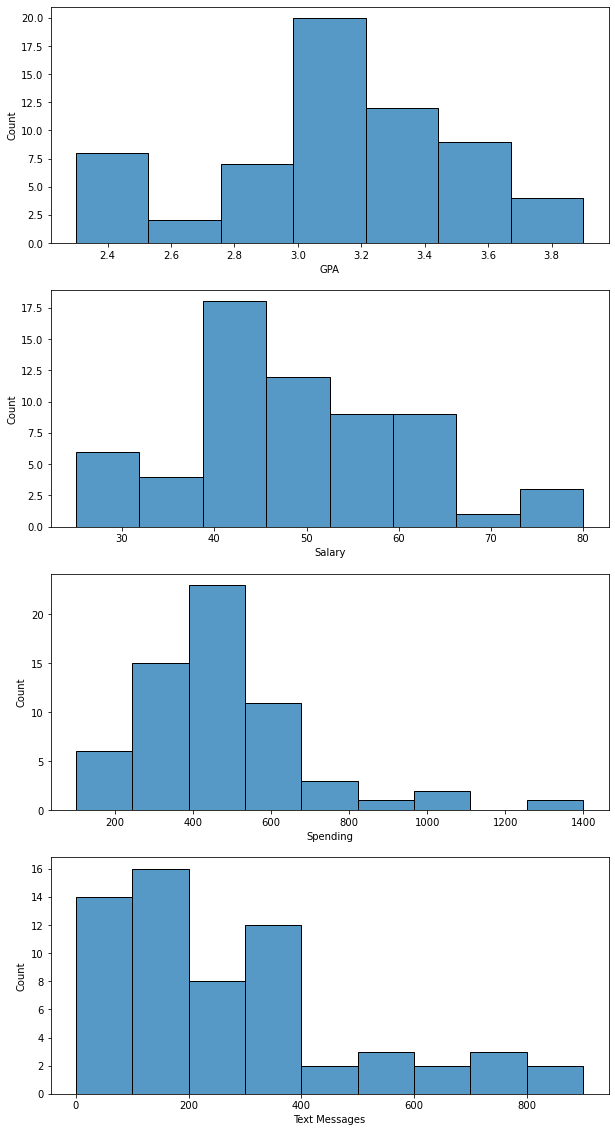

In [225]:
plt.figure(figsize=(10,20))

plt.subplot(4,1,1)
sns.histplot(x='GPA', data=cmsu_df)


plt.subplot(4,1,2)
sns.histplot(x='Salary', data=cmsu_df)


plt.subplot(4,1,3)
sns.histplot(x='Spending', data=cmsu_df)


plt.subplot(4,1,4)
sns.histplot(x='Text Messages', data=cmsu_df)

In [28]:
## From the above graphs plotted we can see whether the variables follow normal distribution or not

# GPA follows normal distribution but from the graph we can say that it is slightly left skewed
# Salary is also normally distributed and is slightly right skewed
# Spending is not normally distributed and is highly right skewed
# Text Messages is also not normally distributed and is also highly right skewed

# Question 3

### An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and coloring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet are calculated. The company would like to show that the mean moisture content is less than 0.35 pounds per 100 square feet.

### The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.



In [88]:
shingles_df=pd.read_csv('A+&+B+shingles.csv')

In [89]:
shingles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       36 non-null     float64
 1   B       31 non-null     float64
dtypes: float64(2)
memory usage: 704.0 bytes


In [90]:
shingles_df.head(36)


,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37
5,0.24,0.18
6,0.16,0.42
7,0.20,0.58
8,0.20,0.25
9,0.20,0.41


In [91]:
shingles_df.describe().T

,count,mean,std,min,25%,50%,75%,max
A,36.0,0.316667,0.135731,0.13,0.2075,0.29,0.3925,0.72
B,31.0,0.273548,0.137296,0.10,0.1600,0.23,0.4000,0.58


## 3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

In [108]:
# we have samples and we have no information on population standard deviation

# Null hypothesis <= 0.35
# Alternate hypothesis >0.35

# Level of significance is 0.05

# we have a sample so we can go with one single T test for shingles A

t_statistic,p_value = stats.ttest_1samp(shingles_df.A,0.35)
t_statistic
print('One sample t test for shingle A : t statistic: {0} p value: {1} '.format(t_statistic, p_value/2))

One sample t test for shingle A : t statistic: -1.4735046253382782 p value: 0.07477633144907513 


### As we can see the pvalue > 0.05 we have no evidence of rejecting null hypothesis for shingles A, that is we have no evidence that mean moisture content in Shingle A sample is less than 0.35 pounds per 100 square feet. If the population mean mositure is no less than 0.35 pounds per 100 feet, probability that sample A of 36 shingles that results in mean mositure of 0.316 pound per 100 feet or less is 0.074

In [127]:
# Null hypothesis <= 0.35
# Alternate hypothesis >0.35

# Level of significance is 0.05

# we have a sample so we can go with one single T test for shingles B

t_statistic,p_value = stats.ttest_1samp(shingles_df.B,0.35, nan_policy='omit')
t_statistic
print('One sample t test for shingle B : t statistic: {0} p value: {1} '.format(t_statistic, p_value/2), )

One sample t test for shingle B : t statistic: -3.1003313069986995 p value: 0.0020904774003191826 


### The pvalue of shingles B is 0.00209 which is lesser than 0.05. There is a evidence for rejecting the null hypothesis. Th mositure content in shingles sample B is not less than 0.35 pounds per 100 sqaure feet. If the population mean mositure is no less than 0.35 pounds per 100 feet, probability that sample B of 31 shingles that result in mean moisture of 0.27 or less is 0.0209

## 3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

In [126]:
# Level of significance is 0.05

# Here we have to know the population mean of Shingles A and Shingles B

# Null hypothesis : population mean of A= population mean of B
# Alternate hypothesis : population mean of A != population mean of B

# as there are two samples to be tested we use two sided T test 


t_statistic,p_value= stats.ttest_ind(shingles_df.A,shingles_df.B, nan_policy='omit')
print('Two sided T test : t_statistic={},p_value={}'.format(round(t_statistic,3),round(p_value,3)))

Two sided T test : t_statistic=1.29,p_value=0.202


### As we can see that the pvalue is greater than 0.05 we have no evidence to reject null hypothesis. We can say that population mean of Shingles A is equal to population mean of Shingles B